# Imports:

In [160]:
from math import pi, sin, cos
from typing import Sequence
import numpy as np
import random
import matplotlib.pyplot as plt

# Classes:

In [161]:
class Transformer:
    """
    the class to create and perform transformers

    methods:
    subTransform:
        to apply all changes of a transformer on an object and return aa new object
    shift:
        the function to shift the point on y axis by the shiftParam
    scale:
        the function to scale the point by the scaleParam
    rotate:
        the function to rotate the point by the rotation matrix
    mirror:
        the function to mirror the orientation of the point by the mirroringParam

    """
    def __init__(self, scaleParam: Sequence[float], rotateParam: float, shiftParam: float, mirroringParam: float) -> None:
        """
        creates transformers based on the params

        :param mirroringParam:-1. if the transformer change the mirroring of the object else +1.
        :type mirroringParam: float
        :param scaleParam:the scale coefficient of transformer
        :type scaleParam: float
        :param shiftParam:the shift vector of the transformer
        :type shiftParam: np.array
        :param rotateParam:the change of theta witch the transformer applies
        :type rotateParam: float

        R is the rotation matrix.
        """
        self.scaleParam =scaleParam
        self.rotateParam = rotateParam
        self.shiftParam = shiftParam
        self.mirroringParam = mirroringParam
        self.R = np.array([[cos(rotateParam),-sin(rotateParam)],[sin(rotateParam),cos(rotateParam)]])

    def shift(self, point: np.array) -> np.array:
        """
        the function to shift the point on y axis by the shiftParam

        :param point:the initial point
        :type point: np.array
        :return: the final point
        :rtype: np.array
        """
        point[1] += self.shiftParam
        return point

    def rotate(self, point: np.array) -> np.array:
        """
        the function to rotate the point by the rotation matrix

        :param point:the initial point
        :type point: np.array
        :return: the final point
        :rtype: np.array
        """
        return np.dot(point,self.R)

    def scale(self, point: np.array) -> np.array:
        """
        the function to scale the point by the scaleParam

        :param point:the initial point
        :type point: np.array
        :return: the final point
        :rtype: np.array
        """
        return self.scaleParam*point

    def mirror(self, point: np.array) -> np.array:
        """
        the function to mirror the orientation of the point by the mirroringParam

        :param point:the initial point
        :type point: np.array
        :return: the final point
        :rtype: np.array
        """
        point[0] *= self.mirroringParam
        return point

    def subTransform(self, point: np.array) -> np.array:
        """
        to apply all changes of a transformer on an object and return a new object
        the sort of the changes is important
        .
        :param point:the initial point
        :type point: np.array
        :return: the final point
        :rtype: np.array
        """
        return self.shift(self.rotate(self.scale(self.mirror(point.copy()))))

In [162]:
class BarnsleyFern:
    """
    the class to create BarnsleyFern object and simulate the fractal growth

    methods:
        getSequence:
            returns a random sequence of transformers with the input size

        drawRandomFractal:
            draws a random BarnsleyFern fractal plot

    """

    def getSequence(self, depth: int) -> Sequence[Transformer]:
        """
        returns a random sequence of transformers with the input size

        :param depth:the depth of fractal growth
        :type depth:int
        :return:the random list of transformers with the size of depth
        :rtype:Sequence[Transformer]
        """
        return random.choices(self.transformers,k = depth)

    def __init__(self, firstPoint: np.array, transformers: Sequence[Transformer]) -> None:
        """
        the function to create the Dragon object with the first object and the transformers
        X is the list of xs of the points.
        Y is the list of ys of the points.

        :param firstPoint:the first point
        :type firstPoint:np.array
        :param transformers:the transformers to apply on the objects
        :type transformers:Transformer
        """
        self.firstPoint = firstPoint
        self.transformers = transformers
        self.X = []
        self.Y = []

    def drawRandomFractal(self, depth: int, iterations: int) -> None:
        """
        draws a random BarnsleyFern fractal plot

        :param depth:the depth of fractal growth
        :type depth:int
        :param iterations:the number of redrawing iterations
        :type iterations:int
        """

        for _ in range(iterations):
            sequence = self.getSequence(depth)
            newPoint = self.firstPoint
            for i in range(depth):
                newPoint = sequence[i].subTransform(newPoint)

            self.X.append(newPoint[0])
            self.Y.append(newPoint[1])


# Main Part:

### creating the first point and the transformers:

In [163]:
firstPoint = np.array([0.,1.])
transformer1 = Transformer([0.85,0.85],pi/36,0.16,1.)
transformer2 = Transformer([0.33,0.33],2*pi/9,0.04,-1.)
transformer3= Transformer([0.33,0.33],-2*pi/9,0.16,1.)
transformer4 = Transformer([0,0.16],0,0.,1.)
transformers = [transformer4,transformer3,transformer2,transformer1]

### creating the fractal object

In [164]:
barnsleyFern = BarnsleyFern(firstPoint,transformers)

### running the process

In [165]:
barnsleyFern.drawRandomFractal(20,10000000)

### visualizing:

(-0.2, 0.2)

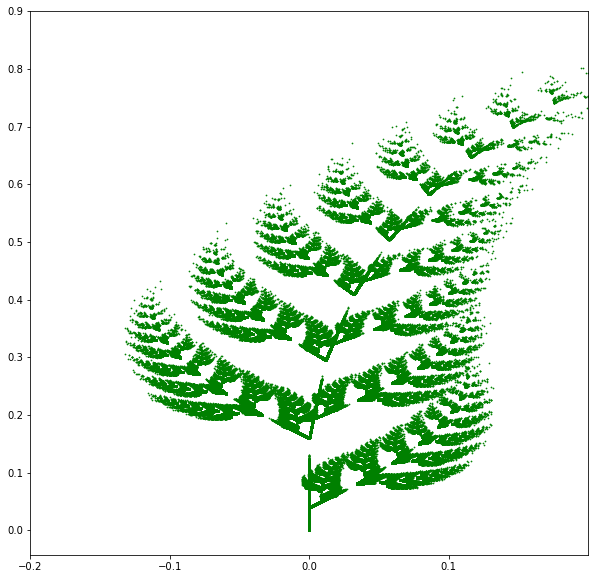

In [166]:
plt.figure(figsize=(10,10))
plt.scatter(barnsleyFern.X,barnsleyFern.Y,s=0.5,c="green")
plt.yticks(np.array(range(10))/10)
plt.xticks(np.array(range(-2,2))/10)
plt.xlim(-0.2,0.2)